In [1]:
import loompy
import scanpy as sc
import os
import re
import pandas as pd
import seaborn
import numpy as np

# Lamanno Dev Labels 

I realigned with Kallisto by pulling fastqs from SRA and didn't have the metadata from this loom file to directly apply the labels

In [4]:
dev_loom=sc.read_loom('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/dev_all.loom')

/home/matthew.schmitz/Matthew/utils/miniforge3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
dev_loom.obs['Subclass'].unique()

array(['Parietal endoderm', 'Undefined', 'Extraembryonic ectoderm',
       'Endoderm', 'Visceral endoderm', 'Extraembryonic endoderm',
       'Cardiac mesoderm', 'Osteochondral mesoderm', 'Mesoderm',
       'Hematoendothelial lineage', 'Mesenchyme', 'Nascent mesoderm',
       'Primordial germ cells', 'Epiblast', 'Definitive endoderm',
       'Anterior primitive streak', 'Node', 'Early choroid plexus',
       'Fourth-ventricle roof plate', 'Floor plate', 'Caudal', 'Anterior',
       'Optic cup', 'Neuromesodermal progenitors', 'Cardiac', 'Paraxial',
       'Pharyngeal', 'Neural crest', 'Gut', 'Early ectoderm',
       'Dorsal early ectoderm', 'Surface ectoderm', 'Otic vesicle',
       'Pharyngeal epithelium', 'Oral ectoderm', 'Lens',
       'Adenohypophyseal placode', 'Lateral nasal pit', 'Olfactory pit',
       'Olfactory epithelium', 'Erythrocyte', 'Erythroid progenitor',
       'Chondrocytes', 'Early fibroblasts',
       'Perivascular fibroblast-like cells', 'Pia 1', 'Pia 2', 'Pia 3',


In [10]:
dev_loom.obs['ClusterName'].unique()

array(['ParEndo', 'nan', 'TrophEct', 'FGut4', 'FGut1', 'FGut3', 'FGut2',
       'VEnd1', 'VEnd3', 'VEnd2', 'ExVE5', 'ExVE4', 'ExVE3', 'ExVE2',
       'ExVE1', 'CardCres', 'MesPer', 'MesOst', 'Mesod4', 'Mesod3',
       'Mesod5', 'Mesod6', 'CardCr', 'Mesn1', 'HemEndPr1', 'HemEndPr2',
       'HematProg', 'Mesod2', 'Mesod1', 'GermC', 'Epi1', 'Epi2', 'Epi3',
       'DVE1', 'DVE2', 'DVE3', 'AEMeso', 'ChorProg', 'RglHB1', 'Mesn2',
       'Mesn3', 'Mesn4', 'Mesn5', 'Mesn6', 'Mesn7', 'Mesn8', 'Mesn9',
       'NEpit1', 'NEpit4', 'NEpit3', 'NEpit2', 'NMP', 'MesnPhar1',
       'PxMeso2', 'PxMeso1', 'NeurCrest2', 'NeurCrest1', 'PxMeso3',
       'Ectoderm5', 'Ectoderm3', 'Ectoderm4', 'Ectoderm1', 'Ectoderm2',
       'Surfecto', 'OticV', 'PharEpi', 'OrEcto1', 'LensEcto', 'OrEcto2',
       'Ectoderm6', 'NasPitL', 'OlfPit1', 'OlfPit2', 'OlfEpit', 'Ery1',
       'Ery2', 'Ery3', 'Ery4', 'Ery5', 'EryProg1', 'EryProg2', 'EryProg3',
       'EryProg4', 'EryProg5', 'Chondro', 'FibroE1', 'FibroE2', 'FibroE3',


In [13]:
dev_loom.obs.to_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/obs.csv')

In [16]:
adata=sc.read_h5ad(os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/HvQvM/HvQvMall_cere_clean.h5ad'),backed='r')


In [ ]:
dev_loom.obs.index.to_list()

In [24]:
dev_loom.obs

,Age,CellCycle,Cell_Conc,Chemistry,ChipID,Class,ClusterName,Clusters,Date_Captured,DonorID,...,Species,Split,Strain,Subclass,Target_Num_Cells,Tissue,TotalUMI,Transcriptome,cDNA_Lib_Ok,ngperul_cDNA
CellID,,,,,,,,,,,,,,,,,,,,,
10X39_2_A_1:AAACTTGAGAGCAGx,e7.0,0.004568,500,v2,10X39,Gastrulation,ParEndo,0,2016-09-30,Batch09F-1/2,...,Mm,1,CD-1,Parietal endoderm,3500.0,All (No extraembryonal),2189.0,mm10,Y,"9,4"
10X39_3_A_1:AAGTTCCTAGCCTAx,e7.0,0.010881,500,v2,10X39,Gastrulation,ParEndo,0,2016-09-30,Batch09F-1/2,...,Mm,1,CD-1,Parietal endoderm,3500.0,All (No extraembryonal),2757.0,mm10,Y,"10,5"
10X39_2_A_1:GGGACCACAGCGTTx,e7.0,0.011941,500,v2,10X39,Gastrulation,ParEndo,0,2016-09-30,Batch09F-1/2,...,Mm,1,CD-1,Parietal endoderm,3500.0,All (No extraembryonal),4941.0,mm10,Y,"9,4"
10X39_2_A_1:CAGCAATGGGTAGGx,e7.0,0.010641,500,v2,10X39,Gastrulation,ParEndo,0,2016-09-30,Batch09F-1/2,...,Mm,1,CD-1,Parietal endoderm,3500.0,All (No extraembryonal),8176.0,mm10,Y,"9,4"
10X39_3_A_1:CAGCCTACAGAGATx,e7.0,0.009255,500,v2,10X39,Gastrulation,ParEndo,0,2016-09-30,Batch09F-1/2,...,Mm,1,CD-1,Parietal endoderm,3500.0,All (No extraembryonal),16640.0,mm10,Y,"10,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X69_4_A_1:ATCGCGCTAGAATGx,e16.0,0.000827,600,v2,10X69,Neuron,Neur797,797,2016-11-17,Batch10G-3,...,Mm,0,CD-1,Pituitary neuroendocrine,3500.0,ForebrainVentroThalamic,7259.0,mm10,Y,"7,2"
10X69_4_A_1:TGCGCACTGGGTGAx,e16.0,0.001561,600,v2,10X69,Neuron,Neur797,797,2016-11-17,Batch10G-3,...,Mm,0,CD-1,Pituitary neuroendocrine,3500.0,ForebrainVentroThalamic,6406.0,mm10,Y,"7,2"
10X69_4_A_1:TGATTCACTGAGAAx,e16.0,0.001129,600,v2,10X69,Neuron,Neur797,797,2016-11-17,Batch10G-3,...,Mm,0,CD-1,Pituitary neuroendocrine,3500.0,ForebrainVentroThalamic,4428.0,mm10,Y,"7,2"


In [35]:
dev_loom.obs['barcode']=[re.sub(":",'',re.search(':[ATCG]+',x).group(0)) for x in dev_loom.obs.index]

In [43]:
dev_loom.obs['barcode'].isin(adata.obs['clean_cellname'])

0.9617805432571497

In [45]:
adata.obs['clean_cellname'][adata.obs['clean_cellname'].duplicated()]

GATTGAAAGCTT_p0-WT3-0                                                                       GATTGAAAGCTT
TCTTATACACAA_e14-WT8-2-0                                                                    TCTTATACACAA
TAACGACCCGCG_e14-WT10-0                                                                     TAACGACCCGCG
TGTCTGGCGACT_p0-WT2-0                                                                       TGTCTGGCGACT
TTTTATTAAAGC_p0-WT4-0                                                                       TTTTATTAAAGC
                                                                                              ...       
TTTGGTTGTTGAGTTC_SRR13565274_GSM5047783_GW21-04_cerebellum_Homo_sapiens_RNA-Seq_kOut    TTTGGTTGTTGAGTTC
TTTGGTTTCCCTTGTG_SRR13565274_GSM5047783_GW21-04_cerebellum_Homo_sapiens_RNA-Seq_kOut    TTTGGTTTCCCTTGTG
TTTGGTTTCTGCGGCA_SRR13565274_GSM5047783_GW21-04_cerebellum_Homo_sapiens_RNA-Seq_kOut    TTTGGTTTCTGCGGCA
TTTGTCACAGACGCAA_SRR13565274_GSM5047783_GW21-04_cerebel

In [84]:
just_lamanno=adata.obs.loc[adata.obs['dataset_name']=='PRJNA637987_lamanno_devmouse',:]
just_lamanno['Age']=[re.search('(e|p)[0-9\.]+',x).group(0) for x in  just_lamanno['batch_name']]

/scratch/fast/15508125/ipykernel_29301/2302216436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_lamanno['Age']=[re.search('(e|p)[0-9\.]+',x).group(0) for x in  just_lamanno['batch_name']]


In [95]:
just_lamanno['agebc']=just_lamanno['Age']+'_' + just_lamanno['clean_cellname'].astype(str)

/scratch/fast/15508125/ipykernel_29301/3543098294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_lamanno['agebc']=just_lamanno['Age']+'_' + just_lamanno['clean_cellname'].astype(str)


In [96]:
dev_loom.obs['agebc']=dev_loom.obs['Age']+'_' + dev_loom.obs['barcode']

In [98]:
dev_loom.obs['agebc'].isin(just_lamanno['agebc'])

CellID
10X39_2_A_1:AAACTTGAGAGCAGx    True
10X39_3_A_1:AAGTTCCTAGCCTAx    True
10X39_2_A_1:GGGACCACAGCGTTx    True
10X39_2_A_1:CAGCAATGGGTAGGx    True
10X39_3_A_1:CAGCCTACAGAGATx    True
                               ... 
10X69_4_A_1:ATCGCGCTAGAATGx    True
10X69_4_A_1:TGCGCACTGGGTGAx    True
10X69_4_A_1:TGATTCACTGAGAAx    True
10X70_6_A_1:TCAAGGACAAGCAAx    True
10X70_6_A_1:GAATTAACGCAGAGx    True
Name: agebc, Length: 292495, dtype: bool

In [108]:
dlo=dev_loom.obs

In [110]:
just_lamanno.loc[~just_lamanno['agebc'].duplicated(keep=False),:]

,n_genes,batch_name,dataset_name,timepoint,region,clean_cellname,full_cellname,msregion,general_region,species,percent_ribo,n_counts,log10_n_counts,individual,Age,agebc
GCCTAGCTCGATAC_e10.0_Forebrain_SRR11947585-0,6249,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GCCTAGCTCGATAC,GCCTAGCTCGATAC_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.226348,45006.0,4.653270,e10.0,e10.0,e10.0_GCCTAGCTCGATAC
GTGAACACGCGTTA_e10.0_Forebrain_SRR11947585-0,6158,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GTGAACACGCGTTA,GTGAACACGCGTTA_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.265230,41907.0,4.622287,e10.0,e10.0,e10.0_GTGAACACGCGTTA
GTTATGCTGAGGTG_e10.0_Forebrain_SRR11947585-0,6046,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GTTATGCTGAGGTG,GTTATGCTGAGGTG_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.217403,38753.0,4.588305,e10.0,e10.0,e10.0_GTTATGCTGAGGTG
GATCCCTGTTGGTG_e10.0_Forebrain_SRR11947585-0,5583,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GATCCCTGTTGGTG,GATCCCTGTTGGTG_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.231932,35062.0,4.544837,e10.0,e10.0,e10.0_GATCCCTGTTGGTG
AACTGTCTGGTAAA_e10.0_Forebrain_SRR11947585-0,5689,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,AACTGTCTGGTAAA,AACTGTCTGGTAAA_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.276798,32652.0,4.513910,e10.0,e10.0,e10.0_AACTGTCTGGTAAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGCTATGACCTTT_e18.0_ForebrainVentroLateral_SRR11947657-0,706,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,CCGCTATGACCTTT,CCGCTATGACCTTT_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.156194,1114.0,3.046885,e18.0,e18.0,e18.0_CCGCTATGACCTTT
AGGCAGGAACGCTA_e18.0_ForebrainVentroLateral_SRR11947657-0,764,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,AGGCAGGAACGCTA,AGGCAGGAACGCTA_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.094440,1133.0,3.054230,e18.0,e18.0,e18.0_AGGCAGGAACGCTA
CGGAACCTACGCAT_e18.0_ForebrainVentroLateral_SRR11947657-0,754,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,CGGAACCTACGCAT,CGGAACCTACGCAT_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.014644,956.0,2.980458,e18.0,e18.0,e18.0_CGGAACCTACGCAT
TAATGATGGAGCAG_e18.0_ForebrainVentroLateral_SRR11947657-0,701,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,TAATGATGGAGCAG,TAATGATGGAGCAG_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.114910,1053.0,3.022428,e18.0,e18.0,e18.0_TAATGATGGAGCAG


In [128]:
just_lamanno['original_index']=list(just_lamanno.index)

/scratch/fast/15508125/ipykernel_29301/2703146781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_lamanno['original_index']=list(just_lamanno.index)


In [129]:
merged=pd.merge(left=just_lamanno,right=dlo,on='agebc',how='inner')

In [136]:
adata.obs.loc[merged['original_index'],:]

,n_genes,batch_name,dataset_name,timepoint,region,clean_cellname,full_cellname,msregion,general_region,species,percent_ribo,n_counts,log10_n_counts,individual
GCCTAGCTCGATAC_e10.0_Forebrain_SRR11947585-0,6249,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GCCTAGCTCGATAC,GCCTAGCTCGATAC_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.226348,45006.0,4.653270,e10.0
GTGAACACGCGTTA_e10.0_Forebrain_SRR11947585-0,6158,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GTGAACACGCGTTA,GTGAACACGCGTTA_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.265230,41907.0,4.622287,e10.0
GTTATGCTGAGGTG_e10.0_Forebrain_SRR11947585-0,6046,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,GTTATGCTGAGGTG,GTTATGCTGAGGTG_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.217403,38753.0,4.588305,e10.0
AGCGATTGGAACCT_e10.0_Forebrain_SRR11947585-0,5698,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,AGCGATTGGAACCT,AGCGATTGGAACCT_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.217916,34862.0,4.542352,e10.0
AGCGATTGGAACCT_e10.0_Forebrain_SRR11947585-0,5698,e10.0_Forebrain_SRR11947585,PRJNA637987_lamanno_devmouse,10,FB,AGCGATTGGAACCT,AGCGATTGGAACCT_e10.0_Forebrain_SRR11947585,nan,h,mouse,0.217916,34862.0,4.542352,e10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AATGAGGATGTCGA_e18.0_ForebrainVentroLateral_SRR11947657-0,902,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,AATGAGGATGTCGA,AATGAGGATGTCGA_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.091538,1300.0,3.113943,e18.0
GAAATACTTGGTTG_e18.0_ForebrainVentroLateral_SRR11947657-0,866,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,GAAATACTTGGTTG,GAAATACTTGGTTG_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.206020,1495.0,3.174641,e18.0
GGACCTCTTTGAGC_e18.0_ForebrainVentroLateral_SRR11947657-0,725,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,GGACCTCTTTGAGC,GGACCTCTTTGAGC_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.059347,1011.0,3.004751,e18.0
CTCATTGACGTTAG_e18.0_ForebrainVentroLateral_SRR11947657-0,753,e18.0_ForebrainVentroLateral_SRR11947657,PRJNA637987_lamanno_devmouse,18,FB,CTCATTGACGTTAG,CTCATTGACGTTAG_e18.0_ForebrainVentroLateral_SR...,nan,h,mouse,0.034286,1050.0,3.021189,e18.0


In [143]:
merged.index=merged['original_index']

In [151]:
merged.loc[~merged.index.duplicated(False),:].to_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/unambiguous_metadata_renamed.csv')

# Linnarson Juvenile

Read in collected juvenile data (realigned with Kallisto)

In [2]:
adata=sc.read_h5ad(os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/KDCbVelocityMouseWbAdultPresupervision.h5ad'),backed='r')

In [3]:
adata.obs['timepoint'].unique()

array([  47,   50,   49,   81,   46,   40,   45,   42,   41,   44,   48,
         43,   37,   51, 6388, 6390, 6392, 6387, 6391, 6389])

In [5]:
df=pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/genomes/cleanome_genomes/all_gene_ids.csv',header=0)
mdict=dict(zip(df.loc[df['species']=='Mus_musculus','gene'],df.loc[df['species']=='Mus_musculus','ortholog_symbol']))
adata.var['mgi_symbol']=adata.var.index
adata.var.index=adata.var.index.to_series().replace(mdict)
adata.var_names_make_unique()


In [ ]:
list(adata.obs['batch_name'].unique())

In [15]:
adata=adata.to_memory()

In [18]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [19]:
adata.write_h5ad(os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/KDCbVelocityMouseWbAdultPresupervisionHumanOrthos.h5ad'))

In [4]:
adata=sc.read_h5ad(os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/KDCbVelocityMouseWbAdultPresupervisionHumanOrthos.h5ad'))

In [ ]:
import json

# Path to your JSON file
file_path = '/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/KDCbVelocityMouseWbAdultPresupervisionHumanOrthos_ABC_MAPPING/hann_results.json'

# Open the file and load its content
with open(file_path, 'r') as file:
    data = json.load(file)

rows = []
for item in data['results']:
    row = {
        'cell_id': item['cell_id'],
        'class_label': item['class_label']['assignment'],
        'supertype_label': item['supertype_label']['assignment'],
        'subclass_label': item['subclass_label']['assignment'],
        'class_label2': item['class_label']['runner_up_assignment'],
        'supertype_label2': item['supertype_label']['runner_up_assignment'],
        'subclass_label2': item['subclass_label']['runner_up_assignment']
    }
    rows.append(row)

# Create a DataFrame
df = pd.DataFrame(rows)
df.index=df['cell_id']
df=df.loc[df['cell_id'].isin(adata.obs.index),:]
adata.obs.loc[df['cell_id'],["class_label", "subclass_label", "supertype_label"]]=df.loc[:,["class_label", "subclass_label", "supertype_label"]].astype(str)


In [11]:
adata.write_h5ad(os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/KDCbVelocityMouseWbAdultPresupervisionHumanOrthos.h5ad'))

/scratch/fast/16801818/ipykernel_15073/524432219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seaborn.clustermap(np.log(adata.obs.groupby('region')['subclass_label'].value_counts().unstack()+1))


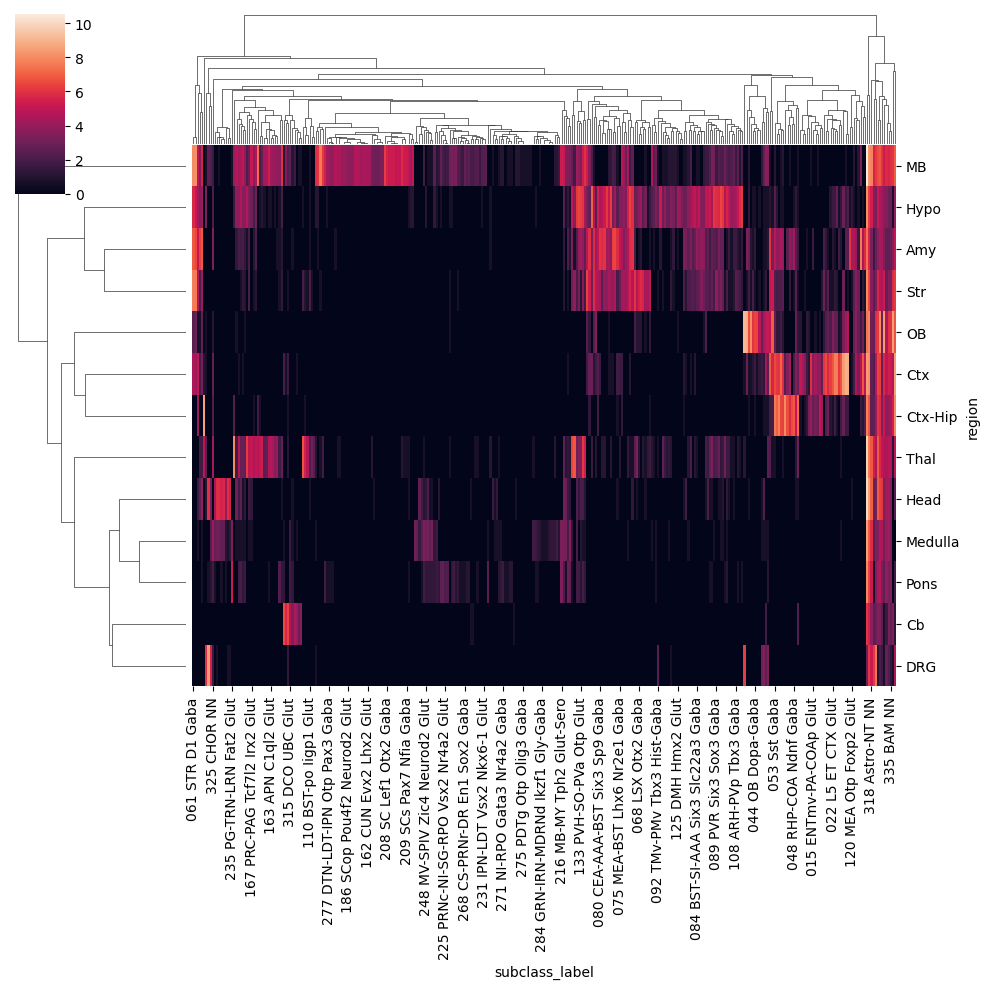

In [6]:
seaborn.clustermap(np.log(adata.obs.groupby('region')['subclass_label'].value_counts().unstack()+1))

# Failed use of adult loom (instead used realigned above)

In [ ]:
adult_loom=sc.read_loom('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/l5_all.loom')

In [5]:
adult_loom.obs.to_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/L5_obs.csv')

In [5]:
alo=pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/L5_obs.csv',index_col=0)

/scratch/fast/15581140/ipykernel_9557/462108657.py:1: DtypeWarning: Columns (2,3,6,7,42,43,44,45,48,49,50,51,52,55,56,57,60,63,68,69,72,73,74,75,76,77,78,79,80,83,84,85,87,88,90,91,92,95,96,99,108,109,110,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  alo=pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/extra/mousefastqpool/SRP135960_linnarson_adultmouse/annotations/L5_obs.csv',index_col=0)


In [12]:
list(alo.columns)

['Age',
 'AnalysisPool',
 'AnalysisProject',
 'Bucket',
 'CellConc',
 'Cell_Conc',
 'ChipID',
 'Class',
 'ClassProbability_Astrocyte',
 'ClassProbability_Astrocyte,Immune',
 'ClassProbability_Astrocyte,Neurons',
 'ClassProbability_Astrocyte,Oligos',
 'ClassProbability_Astrocyte,Vascular',
 'ClassProbability_Bergmann-glia',
 'ClassProbability_Blood',
 'ClassProbability_Blood,Vascular',
 'ClassProbability_Enteric-glia',
 'ClassProbability_Enteric-glia,Cycling',
 'ClassProbability_Ependymal',
 'ClassProbability_Ex-Neurons',
 'ClassProbability_Ex-Vascular',
 'ClassProbability_Immune',
 'ClassProbability_Immune,Neurons',
 'ClassProbability_Immune,Oligos',
 'ClassProbability_Neurons',
 'ClassProbability_Neurons,Cycling',
 'ClassProbability_Neurons,Oligos',
 'ClassProbability_Neurons,Satellite-glia',
 'ClassProbability_Neurons,Vascular',
 'ClassProbability_OEC',
 'ClassProbability_Oligos',
 'ClassProbability_Oligos,Cycling',
 'ClassProbability_Oligos,Vascular',
 'ClassProbability_Satellite-gl

In [8]:
alo['Age']

CellID
10X82_2_TCTCTCACCAGTTA-    p21, p23
10X82_2_TATTATCTACCAGA-    p21, p23
10X82_2_TATCCCAGATGGCA-    p21, p23
10X82_2_ATTACGTATGAATG-    p21, p23
10X82_2_ATACGTCAATAAGG-    p21, p23
                             ...   
10X43_2_TACAACAGTCGT-           p20
10X43_2_ATGATGGGTTAC-           p20
10X43_2_GCAGCTTAGAGA-           p20
10X53_7_GCGATGGGAGGT-        p21-23
10X43_2_TTAATGGGGCAA-           p20
Name: Age, Length: 160796, dtype: object

In [13]:
alo['Region']

CellID
10X82_2_TCTCTCACCAGTTA-    Enteric nervous system
10X82_2_TATTATCTACCAGA-    Enteric nervous system
10X82_2_TATCCCAGATGGCA-    Enteric nervous system
10X82_2_ATTACGTATGAATG-    Enteric nervous system
10X82_2_ATACGTCAATAAGG-    Enteric nervous system
                                    ...          
10X43_2_TACAACAGTCGT-        Dorsal root ganglion
10X43_2_ATGATGGGTTAC-        Dorsal root ganglion
10X43_2_GCAGCTTAGAGA-        Dorsal root ganglion
10X53_7_GCGATGGGAGGT-        Dorsal root ganglion
10X43_2_TTAATGGGGCAA-        Dorsal root ganglion
Name: Region, Length: 160796, dtype: object